In [1]:
%matplotlib inline

# Model Interpretation and Evaluation
This notebook provides examples on how you can interpret and evaluate your models <br>
The code is based on several examples from the internet - credits at the end of the notebook.

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

## Toy example K-folds methods and how it splits the data

In [3]:
from sklearn.model_selection import KFold # import KFold
x_array = np.array([[1, 2], [3, 4], [5, 6], [7, 8]]) # create an array
y_array = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(x_array) # returns the number of splitting iterations in the cross-validator
kf.split(x_array)
    
for k, (train_index, test_index) in enumerate(kf.split(x_array)):
    print('\nfold:', k, '-> train set:', train_index, 'test set:', test_index)
    X_train, X_test = x_array[train_index], x_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    print('train x:', X_train.tolist())
    print('test  x:', X_test.tolist())
    print('train y:', y_train.tolist())
    print('test  y:', y_test.tolist())


fold: 0 -> train set: [2 3] test set: [0 1]
train x: [[5, 6], [7, 8]]
test  x: [[1, 2], [3, 4]]
train y: [3, 4]
test  y: [1, 2]

fold: 1 -> train set: [0 1] test set: [2 3]
train x: [[1, 2], [3, 4]]
test  x: [[5, 6], [7, 8]]
train y: [1, 2]
test  y: [3, 4]


## Toy example of Leave One Out method and how it splits the data

In [4]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([1, 2, 3])
loo = LeaveOneOut()
loo.get_n_splits(X)

for k, (train_index, test_index) in enumerate(loo.split(X)):
    print('\nfold:', k, '-> train set:', train_index, 'test set:', test_index)
    X_train, X_test = x_array[train_index], x_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]
    print('train x:', X_train.tolist())
    print('test  x:', X_test.tolist())
    print('train y:', y_train.tolist())
    print('test  y:', y_test.tolist())


fold: 0 -> train set: [1 2] test set: [0]
train x: [[3, 4], [5, 6]]
test  x: [[1, 2]]
train y: [2, 3]
test  y: [1]

fold: 1 -> train set: [0 2] test set: [1]
train x: [[1, 2], [5, 6]]
test  x: [[3, 4]]
train y: [1, 3]
test  y: [2]

fold: 2 -> train set: [0 1] test set: [2]
train x: [[1, 2], [3, 4]]
test  x: [[5, 6]]
train y: [1, 2]
test  y: [3]


## Real example of Holdout Method

In [5]:
# Load the Diabetes Housing dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [6]:
# Create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [7]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [8]:
predictions[0:5]

array([202.23442831,  97.73276956, 182.49343808, 122.02927935,
       217.19786671])

Text(0,0.5,'Predictions')

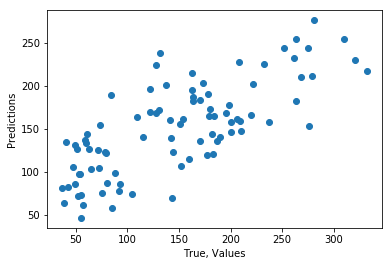

In [9]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True, Values')
plt.ylabel('Predictions')

In [10]:
print ('Score:', model.score(X_test, y_test))

Score: 0.5471731057933333


Score: 0.5004949801267402


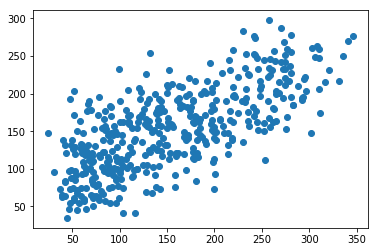

In [11]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)

score = metrics.r2_score(y, predictions)
print('Score:', score)

In [12]:
#Example of K-folds method
from sklearn.model_selection import KFold # import KFold
X = df
kf = KFold(n_splits=4) # Define the split - into 6 folds 
kf.get_n_splits(X)     # Returns the number of splitting iterations in the cross-validator
print(kf) 
lm = linear_model.LinearRegression()

for train_index, test_index in kf.split(X):
    del lm
    lm = linear_model.LinearRegression()
    #print('train_index:', train_index.shape, train_index.shape)
    #print('test_index:', test_index.shape)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #model = lm.fit(X_train, y_train)
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    print ("score calculated by model.score:     ", lm.score(X_test, y_test))
    #print ("score calculated by metrics.r2_score:", metrics.r2_score(y_test, predictions))

KFold(n_splits=4, random_state=None, shuffle=False)
score calculated by model.score:      0.37459087635730126
score calculated by model.score:      0.49678358851330806
score calculated by model.score:      0.5095008563274802
score calculated by model.score:      0.5575584676050648


# How to test the accuracy of a classifier (logistic regression)

### Let's first make a logistic model..

In [13]:
# Read the data into a Pandas DataFrame
import pandas as pd

#url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
url = 'https://query.data.world/s/y2lbwjnwlthnrzrhi6xqgij4meysvs'
#col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','diabetes']
pima = pd.read_csv(url)

In [14]:
#Outcome: 0 = no diabetes, 1 = has diabetes
#Pregnancies: number of times pregnant
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h2>Work Starts Here

<font color=blue>This where we have added our notes as part of Workshop 6. 
<br>1- First, we are visualizing data using pair wise plots
<br>2- Second, we are replacing most of the numeric attributes with mean of the whole column. We are doing this because it is our understanding that no person can have 0 blood pressure, or BMI kind of metrics (as long as they are "alive")
<br>3- Since Logistic Regression is a linear model, we thought it's better to scale the numeric data first. When we did it, we were able to push up the sensitivity and specificity in our results along with decreasing the FpR and TnR.
    
<br><b>Results:</b>
<br>Accuracy was increased from 0.677 to 0.692
<br>True Positives were increased from 114 to 118
<br>True Negatives were decreased from 16 to 12
<br>False Positives were increased from 46 to 47
<br>False Negatives were decreased from 16 to 15
<br>Mis-classification Rate was decreased from 0.322 to 0.307
<br>Sensitvity was decreased from 0.25 to 0.24
<br>Specificity was increased from 0.87 to 0.90
<br>False Positive Rate was decreased from 0.123 to 0.092
<br>Precision previously was 0.5 and we were able to change it to 0.55

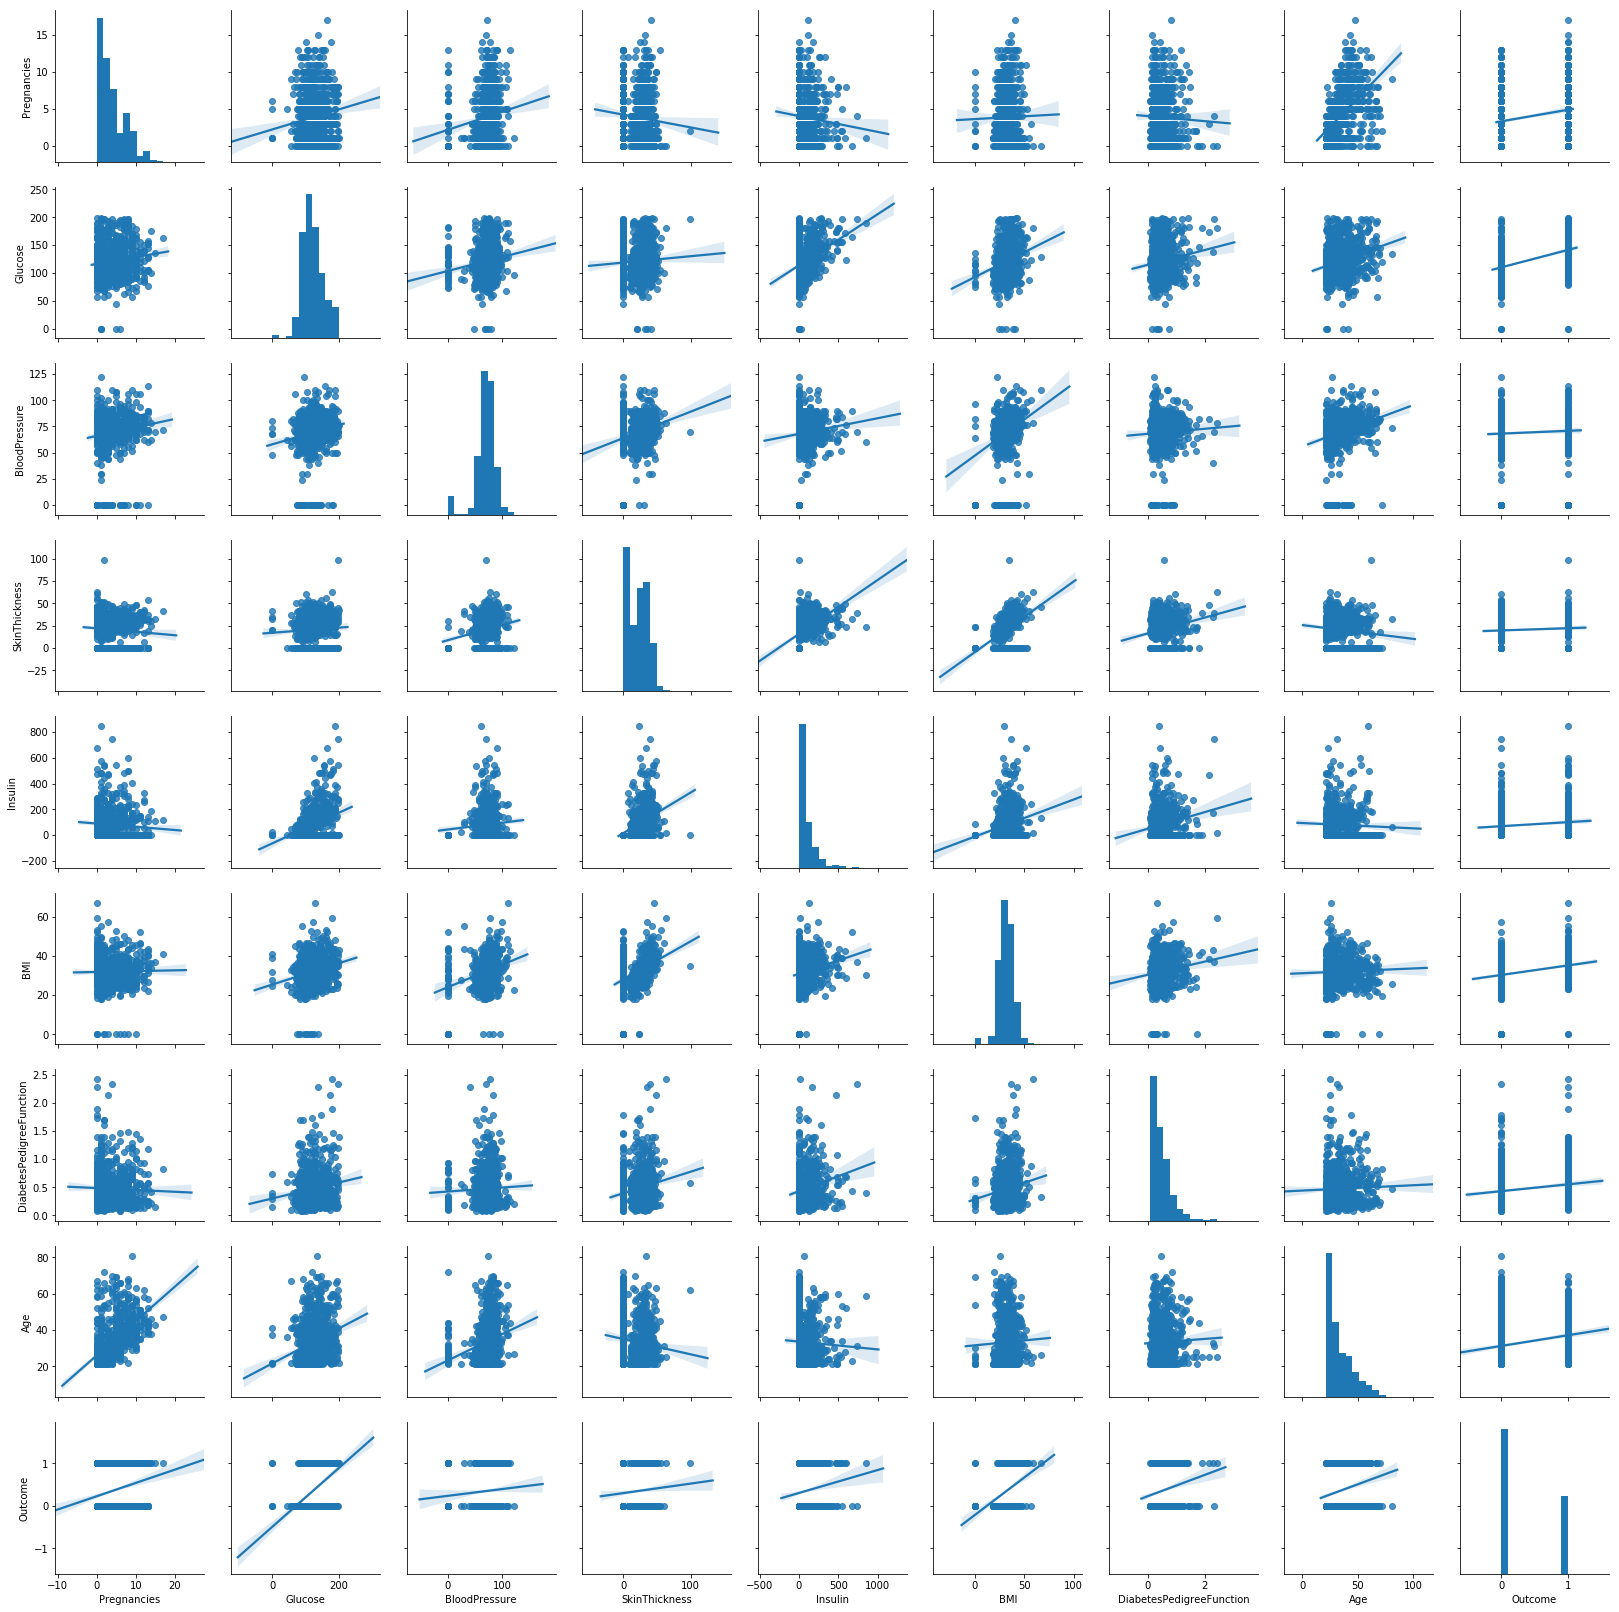

In [16]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(pima, kind="reg")

In [29]:
repl_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction']
for col in repl_col:
    pima[col] = pima[col].replace(0,np.mean(pima[col]))

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def scale_it(df_X):
    df_X = pd.DataFrame(scaler.fit_transform(df_X),columns = df_X.columns.values)
    return df_X

pima[repl_col] = scale_it(pima[repl_col])

<h2>Work Ends Here (Results are chagned changed below)

In [51]:
# define X and y
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.Outcome

In [52]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [53]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(solver='lbfgs')

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

### Classification accuracy: percentage of correct predictions

In [55]:
from sklearn import metrics
print('accuracy:', metrics.accuracy_score(y_test, y_pred_class))

accuracy: 0.6927083333333334


### **Null accuracy:** accuracy that could be achieved by always predicting the most frequent class
**We must always compare with this!!**

In [56]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [57]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()

0.3229166666666667

In [58]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

### Calculate null accuracy (only for binary classification problems coded as 0/1)

In [59]:
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

#### Observations:
- This means that a dumb model that always predicts 0 would be right 68% of the time
- This shows how classification accuracy is not that good as it's close to a dumb model
- It's a good way to know the minimum we should achieve with our models

### Calculate null accuracy (for multi-class classification problems)

In [60]:
y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

### Comparing the true and predicted response values

In [61]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
False: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


**Observations:**
- Classification accuracy is the easiest classification metric to understand
- But it does not tell you the underlying distribution of response values
    - We examine that by calculating the null accuracy
- Also, it does not tell you what "types" of errors your classifier is making

# Confusion Matrix

In [62]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [63]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


In [64]:
#Classification Accuracy: Overall, how often is the classifier correct?
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


In [65]:
#Classification Error: Overall, how often is the classifier incorrect?
#Also known as "Misclassification Rate"
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3072916666666667
0.30729166666666663


In [66]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


In [67]:
# Specificity: When the actual value is negative, how often is the prediction correct?
specificity = TN / (TN + FP)

print(specificity)

0.9076923076923077


In [68]:
#False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)


0.09230769230769231
0.09230769230769231


In [69]:
#Precision: When a positive value is predicted, how often is the prediction correct?
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


# Adjusting the classification threshold

In [54]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [55]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [37]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [38]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

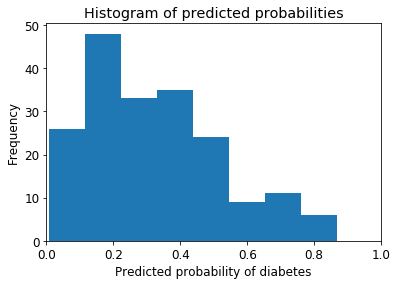

In [39]:
# adjust the font size 
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

### Observations from the histogram:
- About 45% of observations have probability from 0.2 to 0.3
- Small number of observations with probability > 0.5
- This is below the threshold of 0.5
- Most would be predicted "no diabetes" in this case

### Solution:
- Decrease the threshold for predicting diabetes
- Increase the sensitivity of the classifier
- This would increase the number of TP
- More sensitive to positive instances
- Example of metal detector

In [40]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize(y_pred_prob.reshape(1, -1), 0.3)[0]

In [41]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [42]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [43]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[114  16]
 [ 46  16]]


In [44]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


### Observations from the confusion matrix
- The row totals are the same
- The rows represent actual response values
- 130 values top row
- 62 values bottom row
- Observations from the left column moving to the right column because we will have more TP and FP

In [45]:
# sensitivity has increased (used to be 0.24)
print (46 / float(46 + 16))

0.7419354838709677


In [46]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


## Conclusion
- Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be adjusted to increase sensitivity or specificity
- Sensitivity and specificity have an inverse relationship
- Increasing one would always decrease the other
- Adjusting the threshold should be one of the last step you do in the model-building process
- The most important steps are
    + Building the models
    + Selecting the best model

# Receiver Operating Characteristic (ROC) Curves

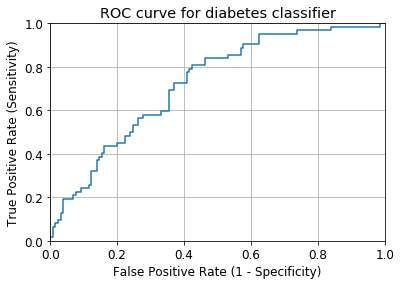

In [47]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Notes on ROC curve:
- ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [48]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [49]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [50]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


# AUC (Area Under the Curve)

AUC is the percentage of the ROC plot that is underneath the curve

In [51]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


### What is AUC?
- AUC is useful as a single number summary of classifier performance
- Higher value = better classifier
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation
- AUC is useful even when there is high class imbalance (unlike classification accuracy, which does not provide good metrics if the classes are imbalanced). A good example of such scenario is a fraud case

In [55]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

# Correlation Matrix to identify correlated variables

In [56]:
# Useful to identify problems related to collinearity. 
# To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values.
# Example code taken from https://scipy.github.io/old-wiki/pages/Numpy_Example_List#corrcoef.28.29

In [57]:
from numpy import *
T = array([1.3, 4.5, 2.8, 3.9]) # temperature measurements
P = array([2.7, 8.7, 4.7, 8.2]) # corresponding pressure measurements
print(corrcoef([T,P])) # correlation matrix of temperature and pressure

rho = array([8.5, 5.2, 6.9, 6.5]) # corresponding density measurements
data = column_stack([T,P,rho])
print (corrcoef([T,P,rho]))

[[1.         0.98062258]
 [0.98062258 1.        ]]
[[ 1.          0.98062258 -0.97090288]
 [ 0.98062258  1.         -0.91538464]
 [-0.97090288 -0.91538464  1.        ]]


# Variance Inflation Factor (VIF)

## Example with a Multiple Regression problem


In [58]:
# Code snippet taken from https://etav.github.io/python/vif_factor_python.html

import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step 1: Run a multiple regression

In [59]:
# define the data/predictors as the pre-set feature names  
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

import statsmodels.api as sm

X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT']] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

### Step 2: Calculate VIF Factors

In [60]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

### Step 3: Inspect the VIF Factors

In [61]:
vif.round(1)

,VIF Factor,features
0,2.1,CRIM
1,2.8,ZN
2,14.5,INDUS
3,1.2,CHAS
4,73.9,NOX
5,77.9,RM
6,21.4,AGE
7,14.7,DIS
8,15.2,RAD
9,61.2,TAX
